<h2>BIKE AVAILABILITY PREDICTION-CAPSTONE PROJECT </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns


<h2>Get the data </h2>

In [2]:
data_bicing=pd.read_parquet('bicing_full.parquet')

In [3]:
data_bicing.head(10)

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,...,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
0,1,2019,3,28,21,0.150000,0.383333,0.416667,0.466667,8013,...,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000,0.033333
1,1,2019,3,28,22,0.033333,0.150000,0.383333,0.416667,8013,...,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000,0.066667
2,1,2019,3,28,23,0.066667,0.033333,0.150000,0.383333,8013,...,9.225,51.25,0.0,1006.599976,22.100000,2.166667,131.666672,7.500000,119.000000,0.033333
3,1,2019,3,29,0,0.033333,0.066667,0.033333,0.150000,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.034483
4,1,2019,3,29,3,0.034483,0.033333,0.066667,0.033333,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.033333
5,1,2019,3,29,4,0.033333,0.034483,0.033333,0.066667,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.033333
6,1,2019,3,29,5,0.033333,0.033333,0.034483,0.033333,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.033333
7,1,2019,3,29,6,0.033333,0.033333,0.033333,0.034483,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.516667
8,1,2019,3,29,7,0.516667,0.033333,0.033333,0.033333,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.600000
9,1,2019,3,29,8,0.600000,0.516667,0.033333,0.033333,8013,...,8.600,57.75,0.0,1006.400024,22.299999,2.533333,73.000000,7.266667,164.333328,0.883333


<h2>Divide into train - test split</h2>

In [4]:
train_set, test_set=train_test_split(data_bicing, test_size=0.2, random_state=42)

In [5]:
train_set.shape

(11434280, 30)

In [6]:
test_set.shape

(2858571, 30)

<h2>Correlation analysis</h2>

In [7]:
matriz= train_set.corr().style.background_gradient(cmap='RdBu', vmax=1, vmin=-1).set_sticky(axis='index')
matriz

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,lat,lon,altitude,capacity,is_holiday,weekday,weekend,avg_temp,max_temp,min_temp,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available
station_id,1.000000,0.099317,0.001516,0.001572,-0.003570,0.109166,0.109110,0.109088,0.109165,0.009408,0.244303,-0.167235,0.377640,-0.007401,-0.001681,-0.000006,-0.000470,-0.003480,-0.002280,-0.003408,-0.001243,-0.008683,0.005795,-0.008398,-0.010791,-0.002184,-0.010365,-0.002200,0.109232
year,0.099317,1.000000,-0.147813,-0.006319,-0.006318,0.070570,0.070502,0.070617,0.070639,0.006781,0.042355,-0.022293,0.068867,-0.014946,-0.019621,0.006436,0.004125,-0.037380,-0.021167,-0.040860,-0.051935,-0.067609,0.123450,-0.067520,-0.074055,-0.049103,-0.076368,-0.032326,0.070572
month,0.001516,-0.147813,1.000000,0.009434,0.001085,0.047801,0.047865,0.047942,0.047967,-0.000488,0.000034,0.002857,-0.002949,-0.000858,0.042985,-0.011984,-0.011191,0.219940,0.201380,0.229073,0.070931,0.024246,-0.198894,-0.164788,-0.099572,0.078684,-0.031650,0.098647,0.047847
day,0.001572,-0.006319,0.009434,1.000000,0.001958,-0.001356,-0.001416,-0.001321,-0.001353,0.000230,0.001117,-0.000197,0.001341,-0.000634,-0.064324,0.000094,-0.003124,0.040961,0.043406,0.044922,0.035591,-0.012830,0.073842,0.004368,-0.033079,0.017792,-0.019911,0.013068,-0.001259
hour,-0.003570,-0.006318,0.001085,0.001958,1.000000,0.048550,0.056267,0.061514,0.061156,-0.001662,-0.002373,0.002016,-0.004135,-0.002229,-0.000306,0.000582,-0.001061,0.001173,0.001257,0.001118,-0.000242,-0.000731,0.000603,0.001397,-0.000696,-0.001079,0.000165,-0.000601,0.037094
ctx_1,0.109166,0.070570,0.047801,-0.001356,0.048550,1.000000,0.887799,0.767238,0.662026,0.024343,0.118553,-0.239342,0.338847,-0.022696,-0.005896,-0.011491,-0.010151,0.050153,0.050238,0.049510,-0.009768,-0.010522,0.009110,0.007457,-0.021489,-0.003294,-0.015986,-0.007549,0.887730
ctx_2,0.109110,0.070502,0.047865,-0.001416,0.056267,0.887799,1.000000,0.887712,0.767232,0.024277,0.118580,-0.239391,0.338875,-0.022685,-0.005724,-0.011766,-0.010154,0.050154,0.050234,0.049515,-0.009821,-0.010288,0.009020,0.007333,-0.021481,-0.003377,-0.015845,-0.007599,0.767257
ctx_3,0.109088,0.070617,0.047942,-0.001321,0.061514,0.767238,0.887712,1.000000,0.887730,0.024290,0.118541,-0.239429,0.338881,-0.022700,-0.005639,-0.011965,-0.010246,0.050169,0.050216,0.049549,-0.009708,-0.009940,0.009096,0.007190,-0.021518,-0.003592,-0.015825,-0.007735,0.661974
ctx_4,0.109165,0.070639,0.047967,-0.001353,0.061156,0.662026,0.767232,0.887730,1.000000,0.024359,0.118555,-0.239422,0.338883,-0.022605,-0.005592,-0.011844,-0.010131,0.050091,0.050102,0.049487,-0.009551,-0.009543,0.009115,0.006891,-0.021611,-0.003864,-0.015818,-0.007892,0.568992
post_code,0.009408,0.006781,-0.000488,0.000230,-0.001662,0.024343,0.024277,0.024290,0.024359,1.000000,0.122969,0.029652,0.071777,0.109829,-0.000013,-0.000512,-0.000538,-0.000831,-0.000728,-0.000824,0.000245,-0.000545,0.000532,-0.000822,-0.000718,0.000106,-0.000699,0.000132,0.024355


<h2>Histogram</h2>

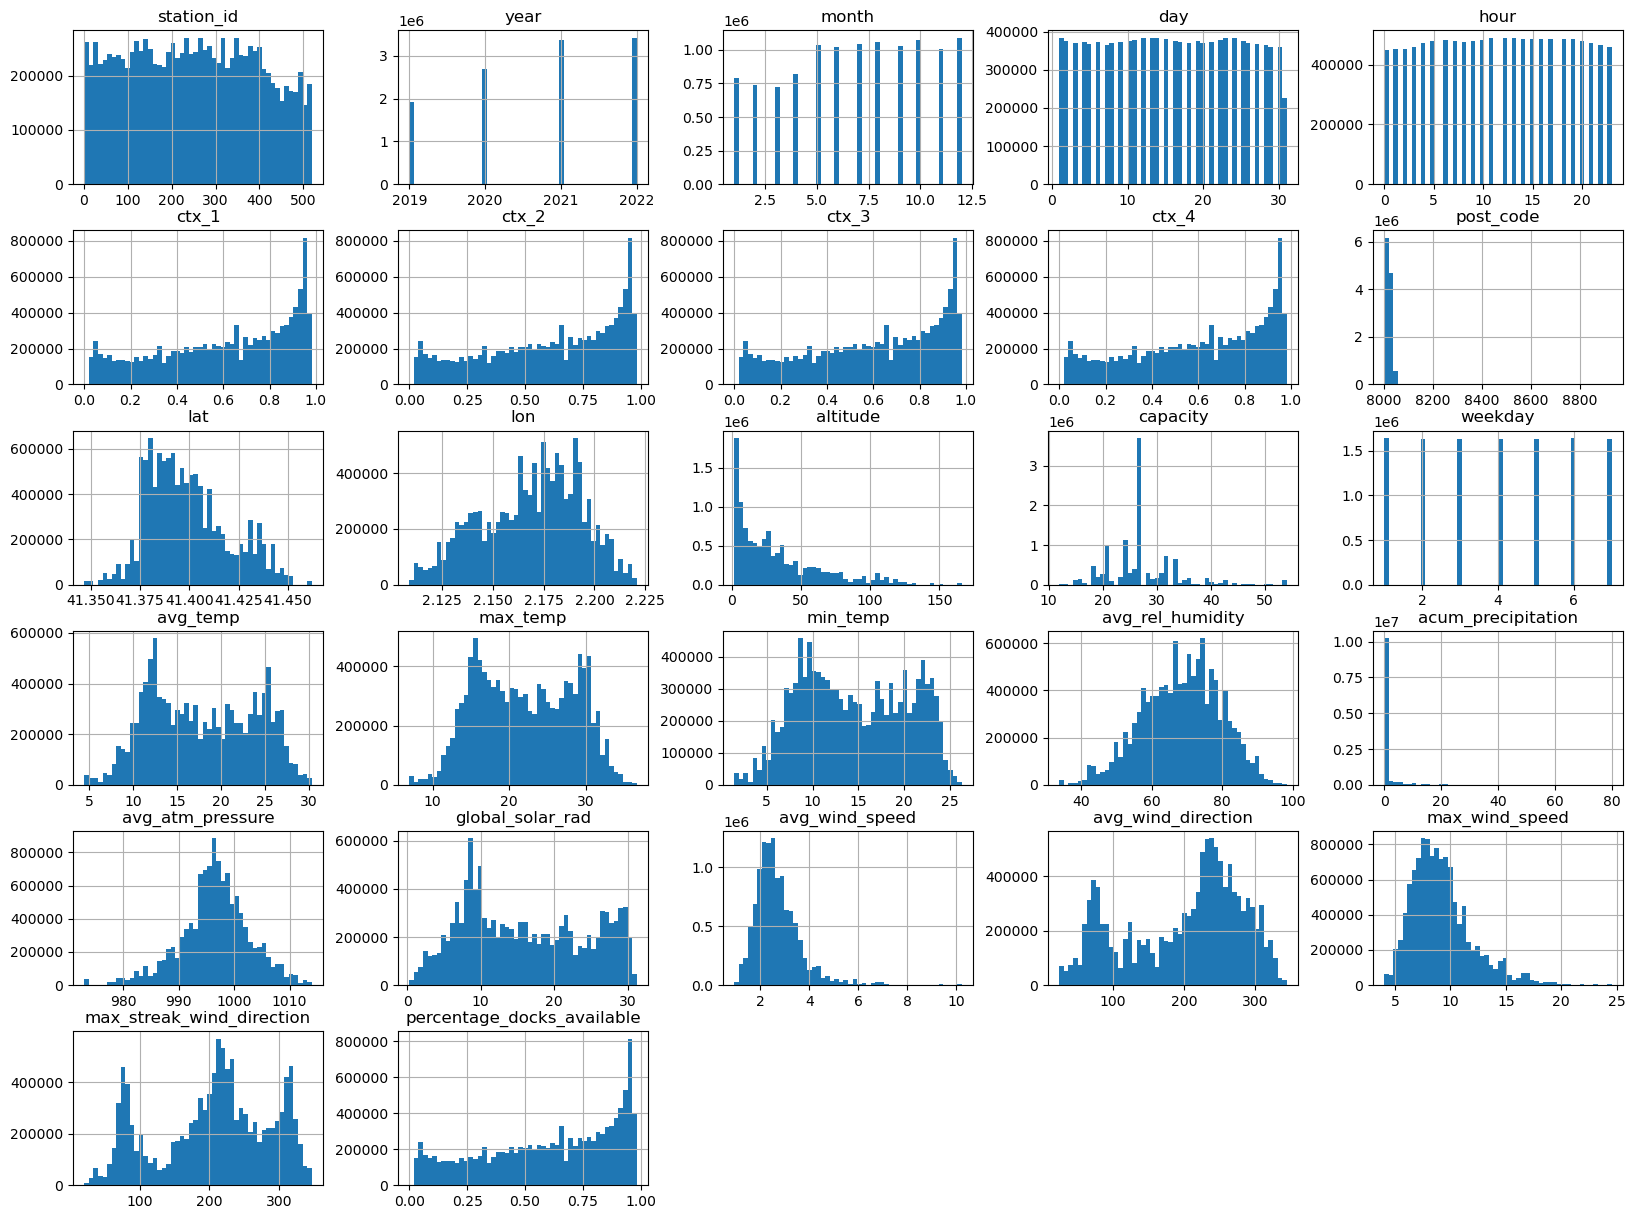

In [8]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

<h2>Prepare the data for Machine Learning algorithms</h2>

<h2>Target Encoder/Mean Encoder </h2>

In [9]:
# Calculamos la media en el train set
train_set['station_id_encoder']=train_set.groupby('station_id')['percentage_docks_available'].transform('mean')

# De los valores rellenados en el train set, nos quedamos con un diccionario que asigna un valor a su media
dct = dict(train_set[['station_id', 'station_id_encoder']].drop_duplicates().values)

# Aplicamos al test
test_set['station_id_encoder'] = test_set['station_id'].map(dct)



In [10]:
test_set

,station_id,year,month,day,hour,ctx_1,ctx_2,ctx_3,ctx_4,post_code,...,avg_rel_humidity,acum_precipitation,avg_atm_pressure,global_solar_rad,avg_wind_speed,avg_wind_direction,max_wind_speed,max_streak_wind_direction,percentage_docks_available,station_id_encoder
5399155,189,2022,4,12,21,0.425926,0.370370,0.740741,0.603774,8037,...,84.75,0.166667,991.633362,4.666667,5.933333,71.666664,13.333333,63.333332,0.888889,0.626160
13746776,493,2022,3,29,12,0.958333,0.958333,0.916667,0.875000,8023,...,67.25,0.000000,990.000000,7.533333,3.500000,63.333332,12.266666,73.666664,0.958333,0.786998
2380402,83,2022,8,22,10,0.565217,0.521739,0.434783,0.891304,8015,...,76.50,0.066667,993.566650,19.200001,1.800000,147.666672,7.566667,185.000000,0.565217,0.654553
12507062,434,2022,2,21,8,0.851852,0.703704,0.555556,0.592593,8028,...,62.00,0.000000,1001.833313,15.566667,3.033333,322.000000,11.366667,330.666656,0.962963,0.682109
2096055,74,2020,8,17,17,0.928571,0.821429,0.785714,0.896552,8029,...,70.50,0.000000,993.266663,20.700001,2.133333,165.666672,7.300000,173.333328,0.928571,0.704212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444875,85,2022,12,7,12,0.740260,0.692308,0.815789,0.826667,8015,...,80.25,0.000000,993.000000,5.400000,1.266667,245.000000,6.333333,306.666656,0.820513,0.487590
8428233,290,2021,5,9,12,0.928571,0.928571,0.928571,0.928571,8016,...,78.00,0.566667,989.299988,19.366667,3.133333,77.666664,11.466666,78.666664,0.928571,0.748733
654107,23,2021,11,13,16,0.590909,0.545455,0.454545,0.681818,8010,...,69.25,0.000000,996.866638,9.400000,2.100000,134.333328,7.933333,145.333328,0.681818,0.618882
8868824,305,2022,6,29,5,0.956522,0.956522,0.956522,0.955556,8034,...,69.25,0.000000,993.966675,30.266666,2.766667,225.333328,10.033334,203.666672,0.869565,0.725769


In [11]:

x_train=train_set[['month', 'day', 'hour','station_id_encoder','altitude','ctx_1','ctx_2','ctx_3','ctx_4']]
y_train=train_set['percentage_docks_available']
x_test=test_set[['month', 'day', 'hour','station_id_encoder','altitude','ctx_1','ctx_2','ctx_3','ctx_4']]
y_test=test_set['percentage_docks_available']

In [12]:
x_train.isnull().sum()

month                 0
day                   0
hour                  0
station_id_encoder    0
altitude              0
ctx_1                 0
ctx_2                 0
ctx_3                 0
ctx_4                 0
dtype: int64

In [13]:
x_test.isnull().sum()

month                 0
day                   0
hour                  0
station_id_encoder    0
altitude              0
ctx_1                 0
ctx_2                 0
ctx_3                 0
ctx_4                 0
dtype: int64

<h2>Standard Scaler</h2>

In [14]:
#para normalizar
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(x_train)

x_train_norm = scalerX.transform(x_train)
x_test_norm = scalerX.transform(x_test)
 



In [15]:
x_train.columns

Index(['month', 'day', 'hour', 'station_id_encoder', 'altitude', 'ctx_1',
       'ctx_2', 'ctx_3', 'ctx_4'],
      dtype='object')

In [16]:
pd.DataFrame(x_train_norm)

,0,1,2,3,4,5,6,7,8
0,0.325799,-1.563168,-0.376193,-1.526873,-0.920819,0.808468,0.591126,1.003446,-0.459398
1,1.515573,-0.200630,0.645511,0.897697,0.223489,1.283877,1.283843,1.174108,1.174107
2,-0.566531,-0.768354,1.667215,1.141977,0.975462,0.909351,0.909328,0.909288,0.727688
3,1.218130,1.275452,-1.251939,-0.618325,-0.397707,-0.361769,-0.361753,-0.361850,-0.581301
4,0.028356,-0.087085,0.353596,0.897697,0.223489,1.280338,0.735311,-0.252139,-0.307018
...,...,...,...,...,...,...,...,...,...
11434275,-1.756305,1.161908,0.499553,1.976711,1.988992,1.167089,1.280304,1.053779,1.053776
11434276,0.920686,0.367094,-0.668108,-0.556264,-0.953513,-1.532006,0.223348,0.954686,0.808397
11434277,0.325799,-1.449623,-1.397897,-1.242397,-0.790041,0.625619,0.625605,0.735263,1.064394
11434278,0.920686,1.388997,0.499553,1.315998,1.302408,1.042516,1.218019,1.042454,1.217992


<h2>Predict and evaluate </h2>

<h2>LinearRegression</h2>

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
# Create the Linear Regression estimator
lm = LinearRegression()

# Perform the fitting
# Regrerssion coefs
lm.fit(x_train_norm, y_train)

# Print coefs
coefs_lm = pd.Series(np.abs(lm.coef_), x_train.columns).sort_values()
print(lm.intercept_, lm.coef_)

#Predict
y_train_pred = lm.predict(x_train_norm)
y_test_pred = lm.predict(x_test_norm)

# Calcular el error cuadrático medio (RMSE) y R2
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
R_2= r2_score(y_test, y_test_pred )

print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE",mean_squared_error( y_train, y_train_pred, squared = False))
print("R^2: ",r2_score(y_train, y_train_pred))

print("----- EVALUATION ON TEST SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("RMSE",mean_squared_error(y_test, y_test_pred, squared = False))
print("R^2: ",r2_score(y_test, y_test_pred ))




0.60305935 [ 2.2390797e-03 -6.8828464e-05 -7.5185322e-04  1.9008571e-02
 -7.1860850e-06  2.7328014e-01 -3.0139469e-02  4.4727996e-03
 -7.7265128e-03]
----- EVALUATION ON TRAIN SET ------
RMSE 0.12938689
RMSE 0.12938689
R^2:  0.7936916016244263
----- EVALUATION ON TEST SET ------
RMSE 0.12929755
RMSE 0.12929755
R^2:  0.793749710862414


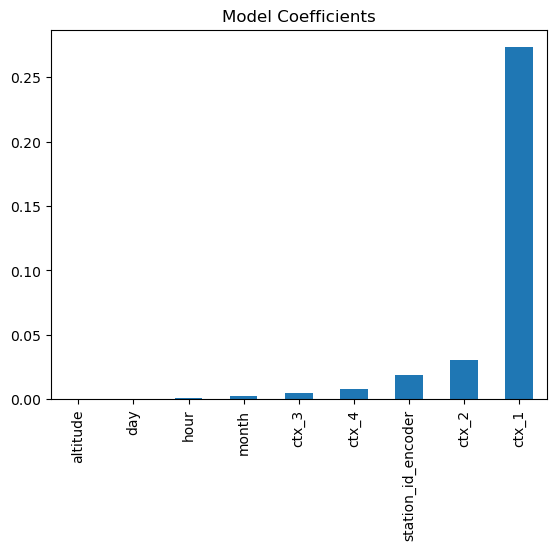

In [47]:
# Plotting abs value of model coefficients
coefs_lm.plot(kind='bar', title='Model Coefficients')
plt.show()



<h2>Regularization Models </h2>

<h3>L2 Regularization: Ridge Regression</h3>

In [19]:
## Ridge Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

ridge = linear_model.Ridge(alpha=1) # Create a Ridge regressor
ridge.fit(x_train_norm, y_train) # Perform the fitting

# Regrerssion coefs
coefs_ridge = pd.Series(np.abs(ridge.coef_), x_train.columns).sort_values()
print(ridge.intercept_,ridge.coef_)

# Prediction
y_train_pred_ridge=ridge.predict(x_train_norm)
y_test_pred_ridge = ridge.predict(x_test_norm)

# Calcular el error cuadrático medio (RMSE) y R2
rmse = mean_squared_error(y_train, y_train_pred_ridge, squared=False)
R_2= r2_score(y_test, y_test_pred_ridge )


print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print("RMSE",mean_squared_error( y_train, y_train_pred_ridge, squared = False))
print("R^2: ",r2_score(y_train, y_train_pred_ridge))

print("----- EVALUATION ON TEST SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print("RMSE",mean_squared_error(y_test, y_test_pred_ridge,squared = False))
print("R^2: ",r2_score(y_test, y_test_pred_ridge))


0.60305935 [ 2.2366601e-03 -6.9145637e-05 -7.4612885e-04  1.8891696e-02
  8.3403647e-05  2.7350274e-01 -3.0509114e-02  4.9481331e-03
 -8.0750138e-03]
----- EVALUATION ON TRAIN SET ------
RMSE 0.12938708
RMSE 0.12938708
R^2:  0.7936910661427875
----- EVALUATION ON TEST SET ------
RMSE 0.12929764
RMSE 0.12929764
R^2:  0.7937494628892533


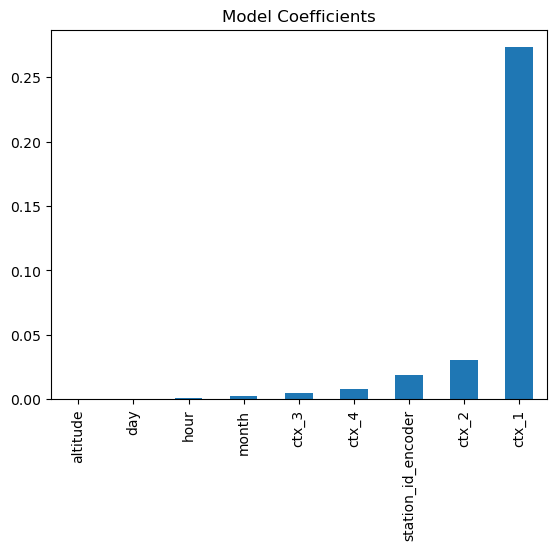

In [48]:
# Plotting abs value of model coefficients
coefs_lm.plot(kind='bar', title='Model Coefficients')
plt.show()


<h3> L1 Regularization: Lasso Regression </h3>

In [43]:
## Lasso Regression
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x_train_norm, y_train)

# Regrerssion coefs
coefs_lasso = pd.Series(np.abs(lasso.coef_), x_train.columns).sort_values()
print(lasso.intercept_,lasso.coef_)

# Prediction
y_test_pred_lasso = lasso.predict(x_test_norm)
y_train_pred_lasso=lasso.predict(x_train_norm)

# Calcular el error cuadrático medio (RMSE) y R2
rmse = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
R_2= r2_score(y_test, y_test_pred_lasso)

print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print("RMSE",mean_squared_error( y_train, y_train_pred_lasso, squared = False))
print("R^2: ",r2_score(y_train, y_train_pred_lasso))

print("----- EVALUATION ON TEST SET ------")
print("RMSE",np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print("RMSE",mean_squared_error(y_test, y_test_pred_lasso,squared = False))
print("R^2: ",r2_score(y_test, y_test_pred_lasso))





0.60305935 [ 0.         -0.          0.          0.          0.          0.15288582
  0.          0.          0.        ]
----- EVALUATION ON TRAIN SET ------
RMSE 0.16491266
RMSE 0.16491266
R^2:  0.6648458418909338
----- EVALUATION ON TEST SET ------
RMSE 0.1647826
RMSE 0.1647826
R^2:  0.6650063548608687


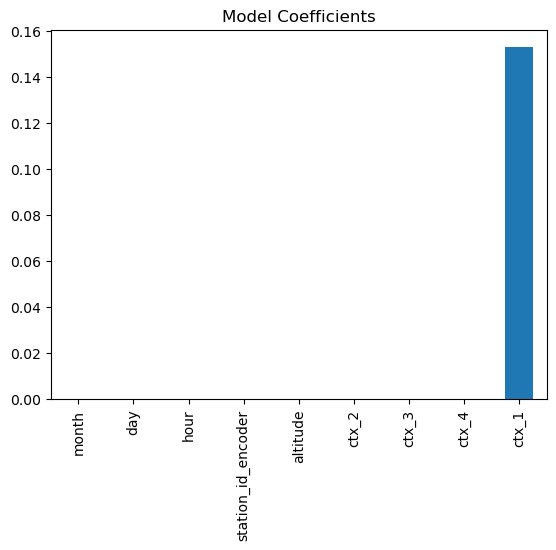

In [45]:
# Plotting abs value of model coefficients
coefs_lasso.plot(kind='bar', title='Model Coefficients')
plt.show()

<h2>Compare the results </h2>

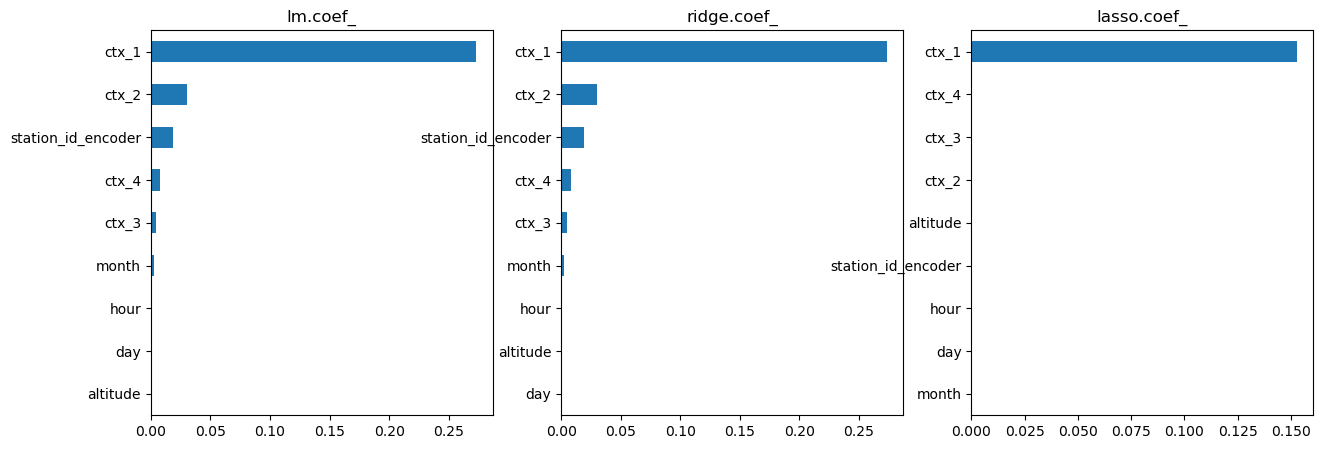

In [46]:

f = plt.figure(figsize=(15,5))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

coefs_lm.plot(kind="barh", title='lm.coef_', ax=ax1)
coefs_ridge.plot(kind="barh", title='ridge.coef_', ax=ax2)
coefs_lasso .plot(kind="barh", title='lasso.coef_', ax=ax3)
plt.show()

<h2>Submit the predictions</h2>

In [24]:
metadata=pd.read_csv('metadata_sample_submission.csv',index_col='index').rename(columns={'ctx-1': 'ctx_1', 'ctx-2': 'ctx_2',
              
                                                                                         'ctx-3': 'ctx_3', 'ctx-4': 'ctx_4'})



In [25]:
metadata

,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1
index,,,,,,,,
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160
...,...,...,...,...,...,...,...,...
54994,269,3,14,3,0.478261,0.478261,0.478261,0.478261
54995,280,3,1,5,0.098765,0.074074,0.074074,0.077160
54996,180,3,20,16,0.782680,0.821895,0.812092,0.777778


In [26]:
bicing_info=pd.read_parquet('bicing_info.parquet')

In [27]:
bicing_info

,station_id,post_code,lat,lon,altitude,capacity
0,1,8013,41.397980,2.180107,16,46
1,2,8013,41.395489,2.177198,17,29
2,3,8013,41.394157,2.181330,11,27
3,4,8013,41.393318,2.181248,8,21
4,5,8018,41.391102,2.180176,7,39
...,...,...,...,...,...,...
501,515,8030,41.435207,2.194800,19,24
502,516,8030,41.435459,2.200157,15,21
503,517,8033,41.462093,2.178959,44,20
504,518,8032,41.424690,2.157049,112,27


In [28]:
metadata=metadata.merge(bicing_info, how='left', on='station_id')

In [29]:
metadata

,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,post_code,lat,lon,altitude,capacity
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,8007,41.387306,2.163126,25,27
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,8034,41.398624,2.120494,117,23
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,8013,41.396839,2.175660,21,27
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,8022,41.405006,2.134603,114,24
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,8022,41.402988,2.134469,106,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54994,269,3,14,3,0.478261,0.478261,0.478261,0.478261,8033,41.448151,2.192940,26,23
54995,280,3,1,5,0.098765,0.074074,0.074074,0.077160,8041,41.413868,2.177727,49,27
54996,180,3,20,16,0.782680,0.821895,0.812092,0.777778,8014,41.367558,2.138822,14,51
54997,277,3,14,11,0.774691,0.953704,0.972222,0.472222,8025,41.408211,2.168996,60,27


In [30]:
metadata=metadata.drop(columns=['post_code','lat','lon','capacity'])

In [31]:
metadata

,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,altitude
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,25
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,117
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,21
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,114
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,106
...,...,...,...,...,...,...,...,...,...
54994,269,3,14,3,0.478261,0.478261,0.478261,0.478261,26
54995,280,3,1,5,0.098765,0.074074,0.074074,0.077160,49
54996,180,3,20,16,0.782680,0.821895,0.812092,0.777778,14
54997,277,3,14,11,0.774691,0.953704,0.972222,0.472222,60


In [32]:
metadata['station_id_encoder'] = metadata['station_id'].map(dct)


In [33]:
metadata

,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,altitude,station_id_encoder
0,394,3,7,8,0.753086,0.780864,0.799383,0.824074,25,0.625226
1,337,3,23,12,0.463768,0.536232,0.532609,0.601449,117,0.795087
2,368,3,31,1,0.787037,0.709877,0.611111,0.601852,21,0.630614
3,327,3,23,15,0.753472,0.809028,0.819444,0.736111,114,0.800209
4,328,3,4,20,0.861111,0.802469,0.814815,0.827160,106,0.805489
...,...,...,...,...,...,...,...,...,...,...
54994,269,3,14,3,0.478261,0.478261,0.478261,0.478261,26,0.592680
54995,280,3,1,5,0.098765,0.074074,0.074074,0.077160,49,0.518074
54996,180,3,20,16,0.782680,0.821895,0.812092,0.777778,14,0.419900
54997,277,3,14,11,0.774691,0.953704,0.972222,0.472222,60,0.635526


In [34]:
metadata=metadata.drop(columns=['station_id'])

In [35]:
metadata

,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,altitude,station_id_encoder
0,3,7,8,0.753086,0.780864,0.799383,0.824074,25,0.625226
1,3,23,12,0.463768,0.536232,0.532609,0.601449,117,0.795087
2,3,31,1,0.787037,0.709877,0.611111,0.601852,21,0.630614
3,3,23,15,0.753472,0.809028,0.819444,0.736111,114,0.800209
4,3,4,20,0.861111,0.802469,0.814815,0.827160,106,0.805489
...,...,...,...,...,...,...,...,...,...
54994,3,14,3,0.478261,0.478261,0.478261,0.478261,26,0.592680
54995,3,1,5,0.098765,0.074074,0.074074,0.077160,49,0.518074
54996,3,20,16,0.782680,0.821895,0.812092,0.777778,14,0.419900
54997,3,14,11,0.774691,0.953704,0.972222,0.472222,60,0.635526


In [36]:
metadata=metadata.loc[:,['month', 'day', 'hour', 'station_id_encoder','altitude', 'ctx_1','ctx_2', 'ctx_3','ctx_4']]

In [37]:
metadata

,month,day,hour,station_id_encoder,altitude,ctx_1,ctx_2,ctx_3,ctx_4
0,3,7,8,0.625226,25,0.824074,0.799383,0.780864,0.753086
1,3,23,12,0.795087,117,0.601449,0.532609,0.536232,0.463768
2,3,31,1,0.630614,21,0.601852,0.611111,0.709877,0.787037
3,3,23,15,0.800209,114,0.736111,0.819444,0.809028,0.753472
4,3,4,20,0.805489,106,0.827160,0.814815,0.802469,0.861111
...,...,...,...,...,...,...,...,...,...
54994,3,14,3,0.592680,26,0.478261,0.478261,0.478261,0.478261
54995,3,1,5,0.518074,49,0.077160,0.074074,0.074074,0.098765
54996,3,20,16,0.419900,14,0.777778,0.812092,0.821895,0.782680
54997,3,14,11,0.635526,60,0.472222,0.972222,0.953704,0.774691


In [38]:
x_met = scalerX.transform(metadata)

In [39]:
x_met

array([[-1.16141764, -0.99544389, -0.52215053, ...,  0.68926159,
         0.62419708,  0.52666475],
       [-1.16141764,  0.82127309,  0.06168023, ..., -0.24727664,
        -0.23464882, -0.48907832],
       [-1.16141764,  1.72963158, -1.54385435, ...,  0.02831434,
         0.3749763 ,  0.64585909],
       ...,
       [-1.16141764,  0.48063866,  0.64551098, ...,  0.73387712,
         0.76824796,  0.63056142],
       [-1.16141764, -0.20063021, -0.08427746, ...,  1.29603283,
         1.2309955 ,  0.60251569],
       [-1.16141764,  1.61608677,  0.64551098, ..., -1.39786896,
        -1.14201975, -1.09329469]])

In [40]:
y_met_pred = lm.predict(x_met)

In [41]:
y_met_pred

array([0.79443325, 0.63937386, 0.60055079, ..., 0.71504318, 0.44194205,
       0.80046177])

In [42]:
metadata_pred = (pd.DataFrame(y_met_pred)
                 .reset_index()
                 .rename(columns={0: 'percentage_docks_available'})
).to_csv('modelo_de_reg_Biking_Bcn.csv', index=False)